In [3]:
# import libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# PART A: ROTATION FUNCTION
# understood cropping from: https://www.digitalocean.com/community/tutorials/data-augmentation-for-object-detection-rotation-and-shearing

# function to rotate image by an angle
def ICV_R(in_img, theta):
    # store number of rows and columns of the input image
    height = in_img.shape[0]
    width = in_img.shape[1]

    # convert theta from degrees to radians
    theta_rad = np.deg2rad(theta)

    # define alpha and beta for the rotation matrix
    alpha = np.cos(theta_rad)
    beta = np.sin(theta_rad)

    # find image center
    cent_x = width // 2
    cent_y = height // 2

    # calculate new width and height of image to avoid cropping
    new_width = int((height * abs(beta)) + (width * abs(alpha)))
    new_height = int((height * abs(alpha)) + (width * abs(beta)))

    # calculate offset of new and old center
    offset_x = (new_width // 2) - cent_x
    offset_y = (new_height // 2) - cent_y 

    # define rotation matrix based on new center
    rotation_matrix = np.array(
    [[alpha, beta, ((1-alpha) * cent_y)-(beta * cent_x)+offset_y],
    [beta * -1, alpha, (beta * cent_y)+((1-alpha) * cent_x)+offset_x]])

    # define output image based on new width
    out_img = np.zeros((new_height, new_width, in_img.shape[2]), dtype=np.uint8)
    
    for y in range(height):
        for x in range(width):
            # apply rotation matrix to every pixel
            new_coords = np.dot(rotation_matrix, np.array([y, x, 1]))

            # round coordinates
            new_x = round(new_coords[1])
            new_y = round(new_coords[0])

            # apply pixel value to new coordinate
            if 0 <= new_x < new_width and 0 <= new_y < new_height:
                out_img[new_y, new_x] = in_img[y, x]

    return out_img   

In [5]:
# PART A: SHEAR FUNCTION
# understood cropping from: https://www.digitalocean.com/community/tutorials/data-augmentation-for-object-detection-rotation-and-shearing

# function to horizontally skew image by an angle
def ICV_S(in_img, theta):
    # make sure theta is in the proper range
    if theta >= 90 or theta <= -90:
        print('Maximum allowed dimension exceeded.')
        return in_img
        
    # store number of rows and columns in the input image
    height = in_img.shape[0]
    width = in_img.shape[1]

    # convert theta from degrees to radians
    theta_rad = np.deg2rad(theta)

    # calculate new width and height of image to avoid cropping
    offset = int(abs(np.tan(theta_rad) * height))
    new_width =  width + offset

    # define shear matrix
    shear_matrix = np.array(
    [[1, 0, 0],
    [np.tan(theta_rad), 1, 0]])

    # define output image based on new width
    out_img = np.zeros((height, new_width, in_img.shape[2]), dtype=np.uint8)
    
    for x in range(width):
        for y in range(height):
            # apply shear matrix to every pixel
            new_coords = np.dot(shear_matrix, np.array([y, x, 1]))

            # round coordinates
            new_x = round(new_coords[1])
            new_y = round(new_coords[0])
            if(theta<0):
                new_x += offset

            # apply pixel value to new coordinate
            if 0 <= new_x < new_width and 0 <= new_y < height:                    
                out_img[new_y, new_x] = in_img[y, x]

    return out_img   

In [6]:
# PART B: ROTATE AND SKEW NAME

# import libraries
from PIL import Image, ImageDraw, ImageFont

# create blank image
width, height = 400, 200
image = Image.new('RGB', (width, height), 'white')
draw = ImageDraw.Draw(image)

# set font and size
try:
    font = ImageFont.truetype("arial.ttf", 72)
except IOError:
    font = ImageFont.load_default()

# define text and position
text = "PEGAH"
text_width, text_height = draw.textbbox((0, 0), text, font=font)[2:]
text_x = (width - text_width) // 2
text_y = (height - text_height) // 2

# draw text on image
draw.text((text_x, text_y), text, font=font, fill='black')

# save image
image.save("pegah.jpeg")

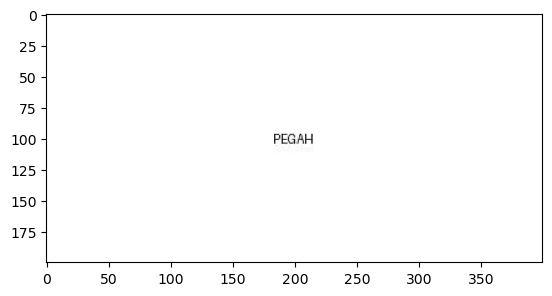

In [7]:
# read image 
pegah_img = cv2.imread("pegah.jpeg")
pegah_img = cv2.cvtColor(pegah_img, cv2.COLOR_BGR2RGB)
plt.imshow(pegah_img)

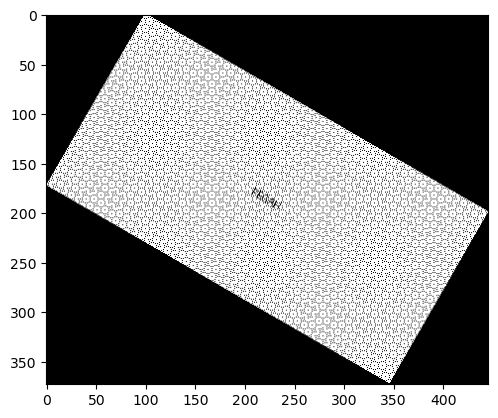

In [8]:
# rotate by 30
rotation30 = ICV_R(pegah_img, 30)
plt.imshow(rotation30)

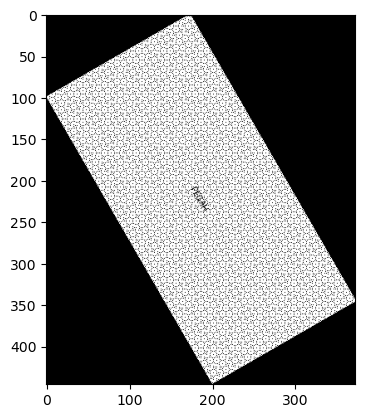

In [9]:
# rotate by 60
rotation60 = ICV_R(pegah_img, 60)
plt.imshow(rotation60)

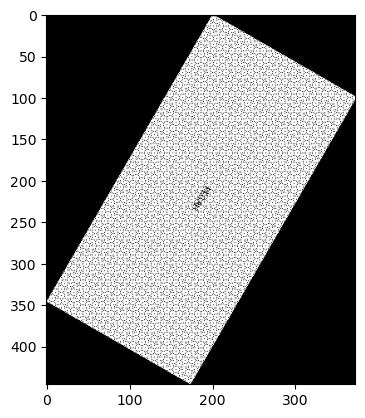

In [10]:
# rotate by 120
rotation120 = ICV_R(pegah_img, 120)
plt.imshow(rotation120)

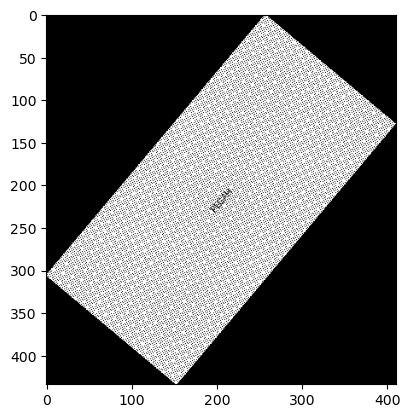

In [11]:
# rotate by -50
rotationn50 = ICV_R(pegah_img, -50)
plt.imshow(rotationn50)

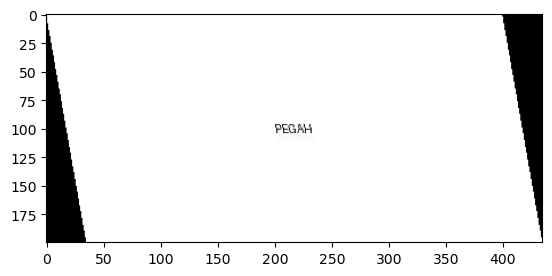

In [12]:
# skew by 10
skew10 = ICV_S(pegah_img, 10)
plt.imshow(skew10)

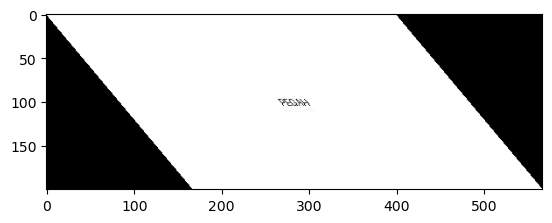

In [13]:
# skew by 40
skew40 = ICV_S(pegah_img, 40)
plt.imshow(skew40)

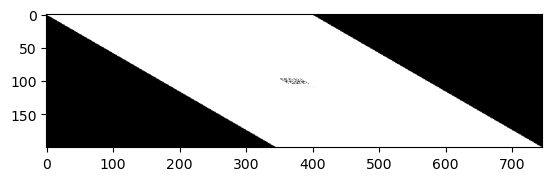

In [14]:
# skew by 60
skew60 = ICV_S(pegah_img, 60)
plt.imshow(skew60)

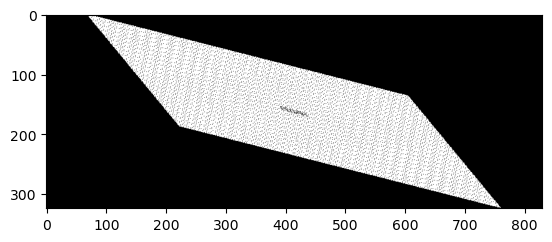

In [15]:
# PART C: CHANGE OPERATION ORDER
# i) rotate by 20 then skew by 50
rotate_skew = ICV_S(ICV_R(pegah_img, 20), 50)
plt.imshow(rotate_skew)

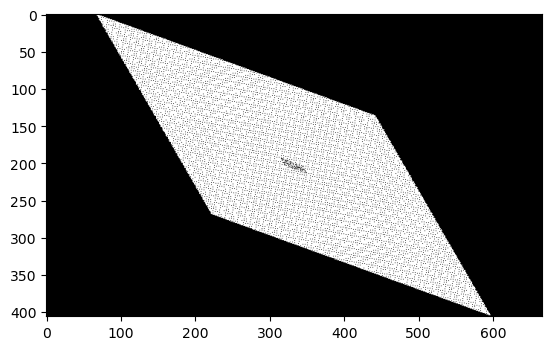

In [16]:
# ii) skew by 50 then rotate by 20
skew_rotate = ICV_R(ICV_S(pegah_img, 50), 20)
plt.imshow(skew_rotate)

In [17]:
# save images
img = Image.fromarray(rotation30)
img.save("rotation30.jpeg")

img = Image.fromarray(rotation60)
img.save("rotation60.jpeg")

img = Image.fromarray(rotation120)
img.save("rotation120.jpeg")

img = Image.fromarray(rotationn50)
img.save("rotationn50.jpeg")

img = Image.fromarray(skew10)
img.save("skew10.jpeg")

img = Image.fromarray(skew40)
img.save("skew40.jpeg")

img = Image.fromarray(skew60)
img.save("skew60.jpeg")

img = Image.fromarray(rotate_skew)
img.save("rotate_skew.jpeg")

img = Image.fromarray(skew_rotate)
img.save("skew_rotate.jpeg")